In [1]:
from Bio import Phylo
tree = Phylo.read('superfam_all_bacteria_and_archaea_ncbi_taxid.newick.txt', 'newick')

In [2]:
print("Leaf nodes: ", tree.count_terminals())
print("Total branch length: ", tree.total_branch_length())
#print(tree)



Leaf nodes:  1273
Total branch length:  13.849860583543782


In [10]:
# get the species names for each node;  get entire lineage names
# DO NOT Re-RUN - dictionaries saved below

sci_name_dict = dict()
lineage_dict = dict()

from Bio import Entrez

for leaf in tree.get_terminals(): 
    print(leaf.name)
    Entrez.email = 'aurovsky@cs.stonybrook.edu'  # Put your email here
    handle = Entrez.efetch('taxonomy', id=leaf.name, rettype='xml')
    response = Entrez.read(handle)

    for entry in response:
        sci_name = entry.get('ScientificName')
        lineage_taxa = entry.get('Lineage').split(';')
        sci_name_dict[leaf.name] = sci_name
        lineage_dict[leaf.name] = lineage_taxa
        #TODO?  I can re-name the leaf nodes with the sci name if needed
        #leaf.name = sci_name
        #print(leaf.name)
        
        #print(sci_name, ' > '.join(lineage_taxa), sep=',')
    
    

565575
505682
1111676
859194
708248
1197325
907287
572263
1129369
272635
767465
347257
243272
347256
943945
512564
262723
267748
1112856
243273
708616
272633
866629
862259
340047
743965
265311
37692
322098
262768
445932
471821
651822
572547
580340
525903
891968
660470
521045
443254
771875
381764
391009
484019
416591
126740
590168
390874
243274
309803
688269
403833
515635
309799
511051
572544
190304
519441
523794
526218
568816
591001
158847
546271
927704
479436
1064535
650150
39492
720554
203119
663278
853
697329
40518
41978
357809
610130
40520
33039
751585
585394
166486
515622
831
642492
931626
657317
515619
515620
903814
693746
699246
245012
245014
245018
499177
272563
546269
350688
293826
1029718
755731
394503
573061
290402
748727
431943
272562
386415
212717
413999
195103
644966
679936
292459
525919
334413
646529
768706
756499
138119
1147129
1131462
645991
485916
760568
868595
349161
696281
477974
370438
635013
643648
335541
498761
858215
580327
608506
632518
632516
632335
632348
521

In [11]:
import pickle
with open('superfam_all_bacteria_and_archaea_sci_name_dict.txt', 'wb') as handle:
    pickle.dump(sci_name_dict, handle)
with open('superfam_all_bacteria_and_archaea_lineage_dict.txt', 'wb') as handle:
    pickle.dump(lineage_dict, handle)

In [ ]:
with open('superfam_all_bacteria_and_archaea_pairwise_distances.txt', 'rb') as handle:
    tmp_pairwise = pickle.loads(handle.read())

In [3]:
# get the distances : do no re-run stored in the file below
count = 0
distances_dict = dict()
for leaf in tree.get_terminals():
    count += 1
    distances_dict[leaf.name] = dict()
    for leaf2 in tree.get_terminals():
        if (leaf.name != leaf2.name):
            distances_dict[leaf.name][leaf2.name] = tree.distance(leaf, leaf2)            
    print("done processing ", str(count), " , ", leaf.name)
    #print(leaf.name, " ", sci_name_dict[leaf.name])
    #print(distances_dict[leaf.name])


done processing  1  ,  565575
done processing  2  ,  505682
done processing  3  ,  1111676
done processing  4  ,  859194
done processing  5  ,  708248
done processing  6  ,  1197325
done processing  7  ,  907287
done processing  8  ,  572263
done processing  9  ,  1129369
done processing  10  ,  272635
done processing  11  ,  767465
done processing  12  ,  347257
done processing  13  ,  243272
done processing  14  ,  347256
done processing  15  ,  943945
done processing  16  ,  512564
done processing  17  ,  262723
done processing  18  ,  267748
done processing  19  ,  1112856
done processing  20  ,  243273
done processing  21  ,  708616
done processing  22  ,  272633
done processing  23  ,  866629
done processing  24  ,  862259
done processing  25  ,  340047
done processing  26  ,  743965
done processing  27  ,  265311
done processing  28  ,  37692
done processing  29  ,  322098
done processing  30  ,  262768
done processing  31  ,  445932
done processing  32  ,  471821
done processin

In [5]:
import pickle
with open('superfam_all_bacteria_and_archaea_pairwise_distances.txt', 'wb') as handle:
    pickle.dump(distances_dict, handle)

In [6]:
with open('superfam_all_bacteria_and_archaea_pairwise_distances.txt', 'rb') as handle:
    tmp_pairwise = pickle.loads(handle.read())

In [9]:
print(len(tmp_pairwise['439481']))

1272


In [27]:
sumt = 0
dists = []
for leaf in tree.get_terminals():
    dist = tree.distance(leaf) 
    sumt += dist
    dists.append(dist)
    #print("Distance from root is ", dist, " for ", leaf.name)
#print(sumt)
print(sorted(dists))

[0.03023113506149295, 0.030295831437066982, 0.03031470857955152, 0.030418252312411527, 0.030445759085389656, 0.030477336420381158, 0.030493485189076956, 0.030657283811658137, 0.030871560918464186, 0.03139162120969376, 0.0314041888271781, 0.031561966572990464, 0.03187386330619478, 0.03206650497983343, 0.03215388288718334, 0.03232745677905037, 0.03238485271500403, 0.03245870541545983, 0.032499078594387505, 0.032515025455518425, 0.032539702226617805, 0.03280551305870211, 0.03281128396755108, 0.03294410157650795, 0.03298203890988, 0.03318432202090305, 0.03322226763255381, 0.0333355968846294, 0.033364450440375365, 0.03336482828410914, 0.03337207442626794, 0.033450299161178906, 0.03347810926918649, 0.033599737959547675, 0.033617521599416056, 0.033698146947199005, 0.03376963067704211, 0.03389103663038406, 0.033893412270016646, 0.033909859750986926, 0.03393131006627886, 0.0339873260420424, 0.03399179358981289, 0.034035903353416753, 0.03404677459808079, 0.034077818318476435, 0.03410662207370871

In [13]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.002187924533934492)
            Clade(branch_length=0.002895660889515132)
                Clade(branch_length=0.0012898562090884204)
                    Clade(branch_length=0.0028818340317278753)
                        Clade(branch_length=0.0017087483514855407)
                            Clade(branch_length=0.004024669013697994)
                                Clade(branch_length=0.0037858836282354696)
                                    Clade(branch_length=0.005348384100447702)
                                        Clade(branch_length=0.003971768740717441)
                                            Clade(branch_length=0.009524319700946176)
                                                Clade(branch_length=0.017061854365080578)
                                                    Clade(branch_length=0.01494717770078862)
                                                        Clade(branch_length=0.001201768065

In [33]:
max_path_length = 0
max_leaf1 = "bla"
max_leaf2 = "bla"
all_dist_list = []
for leaf in tree.get_terminals():
    for leaf2 in tree.get_terminals():
        if (leaf.name != leaf2.name):
            all_dist_list.append(distances_dict[leaf.name][leaf2.name])
            if (distances_dict[leaf.name][leaf2.name] > max_path_length):
                max_path_length = distances_dict[leaf.name][leaf2.name]
                max_leaf1 = leaf
                max_leaf2 = leaf2
print(max_path_length)
print(max_leaf1.name, " to ", max_leaf2.name)

1.078323175447747
820  to  305


Median distance between two leaves is:  0.0814684722441


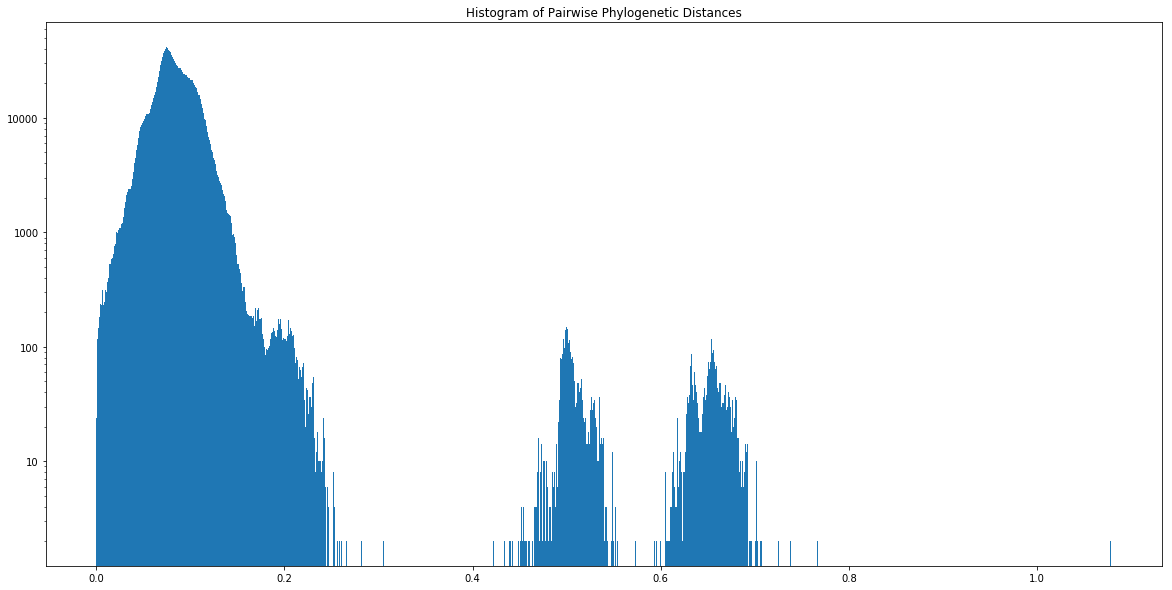

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from matplotlib.ticker import ScalarFormatter
from numpy import median

print("Median distance between two leaves is: ", median(all_dist_list))
plt.figure(1, figsize=(20, 10))
ax = subplot(111)
plt.hist(all_dist_list, bins=1000)
plt.yscale('log')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
plt.title("Histogram of Pairwise Phylogenetic Distances")

plt.show()

In [29]:
print(sci_name_dict[max_leaf1.name], " ", lineage_dict[max_leaf1.name])

Bacteroides uniformis   ['cellular organisms', ' Bacteria', ' FCB group', ' Bacteroidetes/Chlorobi group', ' Bacteroidetes', ' Bacteroidia', ' Bacteroidales', ' Bacteroidaceae', ' Bacteroides']


In [28]:
print(sci_name_dict[max_leaf2.name], " ", lineage_dict[max_leaf2.name])

Ralstonia solanacearum   ['cellular organisms', ' Bacteria', ' Proteobacteria', ' Betaproteobacteria', ' Burkholderiales', ' Burkholderiaceae', ' Ralstonia']


In [23]:
print(tree.distance(max_leaf1))

0.46897614879712585


In [24]:
print(tree.distance(max_leaf2))

0.6195141974975203
